### Задание
Применить к набору данных из задания 3-4 
- алгоритм балансировки классов SMOTE. 
- Разработать для сбалансированного набора данных SVM-, knn-, RF- классификаторы.   
- Выбрать лучшие классификаторы. Сравнить классификаторы на основе показателей качества классификации до и после балансировки.   
- Выполнить визуализацию с помощью t-sne и UMAP (при различных сочетаниях значений их параметров): изобразить объекты разных классов разным цветом (разным маркерами). 
- Сделать рисунки разбиения на классы на основе выборок с известными метками классов и рисунки разбиения на классы с метками выставленными классификатором.

In [1]:
import pandas as pd
import numpy as np

import umap

from imblearn.over_sampling import SMOTE 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('haberman.data', sep=',', 
                 usecols=["Age","Patient's year of operation","Number of positive axillary nodes detected","Survival status"])

In [3]:
df

,Age,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = X.to_numpy()
y = y.to_numpy()

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [5]:
sm = SMOTE()
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

Общие функции

In [6]:
def get_prediction(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    return model.predict(x_test)

In [7]:
def print_best_params(classificator, params, scoring, x, y):
    gs_model = GridSearchCV(classificator, params, scoring=scoring)
    gs_model.fit(x, y)
    print(gs_model.best_params_)

In [8]:
axis = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_test)

x_axis = [i[0] for i in axis]
y_axis = [i[1] for i in axis]

def tsne_visualisation(y_predicted):
    fig, axs = plt.subplots(1,2)
    axs[0].scatter(x_axis,y_axis,c=['green' if i == 1 else 'red' for i in y_test])
    axs[1].scatter(x_axis,y_axis,c=['green' if i == 1 else 'red' for i in y_predicted])
    plt.show

In [9]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(X_test)

def umap_visualisation(y_predicted):
    fig, axs = plt.subplots(1,2)
    axs[0].scatter(embedding[:, 0],embedding[:, 1],c=['green' if i == 1 else 'red' for i in y_test])
    axs[1].scatter(embedding[:, 0],embedding[:, 1],c=['green' if i == 1 else 'red' for i in y_predicted])
    plt.show

### SVC
#### Подбор гиперпараметров для SVC-классификатора

In [10]:
print_best_params(SVC(), ({'kernel': ['linear','rbf','poly', 'sigmoid'],'C': [1, 5, 10, 50, 100, 500, 1000]}), 
                  'accuracy',X_train, y_train)

print_best_params(SVC(), ({'kernel': ['linear','rbf','poly', 'sigmoid'],'C': [1, 5, 10, 50, 100, 500, 1000]}), 
                  'accuracy',X_train_balanced, y_train_balanced)

{'C': 1, 'kernel': 'sigmoid'}
{'C': 1000, 'kernel': 'rbf'}


In [11]:
y_pred_svc = get_prediction(SVC(C=1, kernel='linear'), X_train, y_train, X_test)
y_pred_svc_balanced = get_prediction(SVC(C=1000, kernel='rbf'), X_train_balanced, y_train_balanced, X_test)
print(classification_report(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc_balanced))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75        37
           2       0.00      0.00      0.00        25

    accuracy                           0.60        62
   macro avg       0.30      0.50      0.37        62
weighted avg       0.36      0.60      0.45        62

              precision    recall  f1-score   support

           1       0.64      0.81      0.71        37
           2       0.53      0.32      0.40        25

    accuracy                           0.61        62
   macro avg       0.59      0.57      0.56        62
weighted avg       0.60      0.61      0.59        62



D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

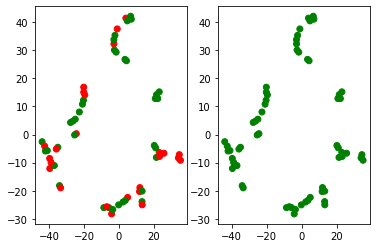

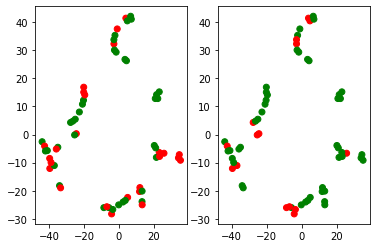

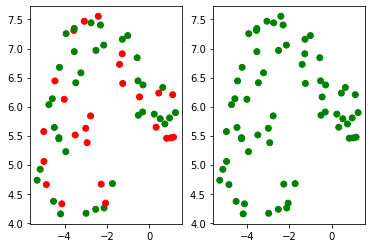

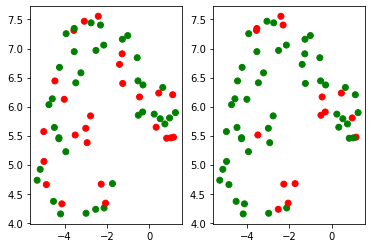

In [12]:
tsne_visualisation(y_pred_svc)
tsne_visualisation(y_pred_svc_balanced)
umap_visualisation(y_pred_svc)
umap_visualisation(y_pred_svc_balanced)

KNN

In [13]:
#Подбор гиперпараметров для kNN-классификатора
print_best_params(KNeighborsClassifier(), 
                  {'n_neighbors': [1,3,5,7,10],'metric': ['euclidean', 'manhattan', 'minkowski'], 
                   'algorithm': ['auto','ball_tree','kd_tree','brute']},
                   'accuracy', X_train, y_train)

print_best_params(KNeighborsClassifier(), 
                  {'n_neighbors': [1,3,5,7,10],'metric': ['euclidean', 'manhattan', 'minkowski'], 
                   'algorithm': ['auto','ball_tree','kd_tree','brute']},
                   'accuracy', X_train_balanced, y_train_balanced)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10}
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1}


In [14]:
y_pred_knn = get_prediction(KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric='manhattan'),
                            X_train, y_train, X_test)

y_pred_knn_balanced = get_prediction(KNeighborsClassifier(n_neighbors=1, algorithm='auto', metric='manhattan'), 
                                     X_train_balanced, y_train_balanced, X_test)

print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn_balanced))

              precision    recall  f1-score   support

           1       0.62      0.97      0.76        37
           2       0.75      0.12      0.21        25

    accuracy                           0.63        62
   macro avg       0.69      0.55      0.48        62
weighted avg       0.67      0.63      0.54        62

              precision    recall  f1-score   support

           1       0.66      0.78      0.72        37
           2       0.56      0.40      0.47        25

    accuracy                           0.63        62
   macro avg       0.61      0.59      0.59        62
weighted avg       0.62      0.63      0.61        62



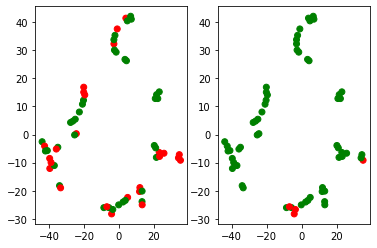

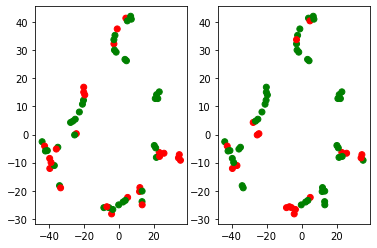

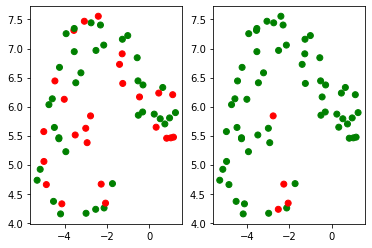

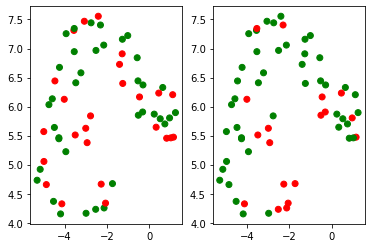

In [15]:
tsne_visualisation(y_pred_knn)
tsne_visualisation(y_pred_knn_balanced)
umap_visualisation(y_pred_knn)
umap_visualisation(y_pred_knn_balanced)

In [16]:
print_best_params(RandomForestClassifier(),
                  {'n_estimators': [100,1000, 2000], 
                   'max_depth': [5,9,15], 
                   'min_samples_split': [6,10, 14, 18], 
                   'min_samples_leaf': [3,5,7,9]},
                  'accuracy', X_train, y_train)

print_best_params(RandomForestClassifier(),
                  {'n_estimators': [100,1000, 2000], 
                   'max_depth': [5,9,15], 
                   'min_samples_split': [6,10, 14, 18], 
                   'min_samples_leaf': [3,5,7,9]},
                  'accuracy', X_train_balanced, y_train_balanced)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 100}
{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 100}


In [17]:
y_pred_rfc = get_prediction(RandomForestClassifier(max_depth=15, min_samples_leaf=7, min_samples_split=6, n_estimators=1000), 
                            X_train, y_train, X_test)

y_pred_rfc_balanced = get_prediction(RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=1000), 
                                     X_train_balanced, y_train_balanced, X_test)

print(classification_report(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc_balanced))

              precision    recall  f1-score   support

           1       0.60      0.95      0.74        37
           2       0.50      0.08      0.14        25

    accuracy                           0.60        62
   macro avg       0.55      0.51      0.44        62
weighted avg       0.56      0.60      0.50        62

              precision    recall  f1-score   support

           1       0.70      0.86      0.77        37
           2       0.69      0.44      0.54        25

    accuracy                           0.69        62
   macro avg       0.69      0.65      0.65        62
weighted avg       0.69      0.69      0.68        62



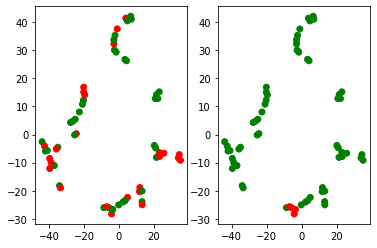

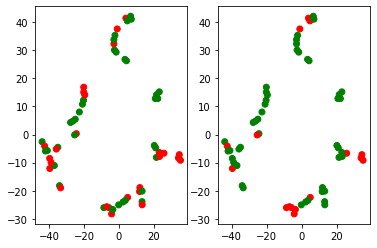

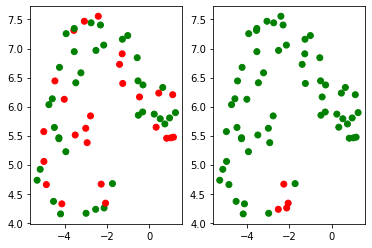

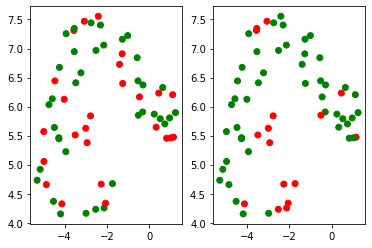

In [18]:
tsne_visualisation(y_pred_rfc)
tsne_visualisation(y_pred_rfc_balanced)
umap_visualisation(y_pred_rfc)
umap_visualisation(y_pred_rfc_balanced)